--2024-11-25 22:56:31--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar.7’

navec_hudlit_v1_12B 100%[===================>]  50.56M  15.9MB/s    in 3.9s    

2024-11-25 22:56:35 (12.9 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar.7’ saved [53012480/53012480]

error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File n

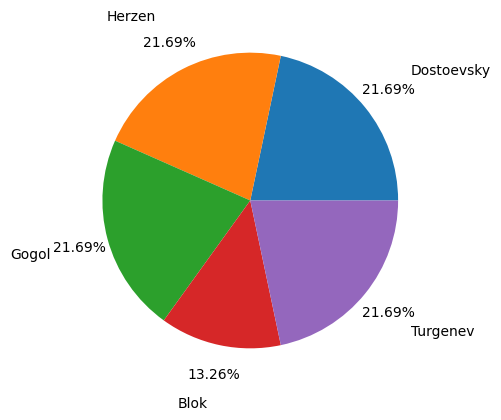

Форма входных данных для обучающей выборки: (4105, 1000)
Форма выходных данных для обучающей выборки: (4105, 5)
Форма входных данных для тестовой выборки: (416, 1000)
Форма выходных данных для тестовой выборки: (416, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.3134 - loss: 2.0062 - val_accuracy: 0.0000e+00 - val_loss: 2.0644
Epoch 2/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9937 - loss: 0.0183 - val_accuracy: 0.0000e+00 - val_loss: 5.3270
Epoch 3/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9984 - loss: 0.0022 - val_accuracy: 0.0000e+00 - val_loss: 7.6908
Epoch 4/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 2.9018e-04 - val_accuracy: 0.0000e+00 - val_loss: 9.4640
Epoch 5/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 1.0000 - loss: 7.1133e-04 - val_accuracy: 0.0000e+00 - val_loss: 10.9181
Epoch 6/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 1.0000 - loss: 2.3402e-04 - val_accuracy: 0.0000e+00 - val_loss: 12.1227
Epoch 7/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 1.0000 - loss: 1.2029e-04 - val_accuracy: 0.0000e+00 - val_loss: 13.1649
Epoch 8/128
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - ac

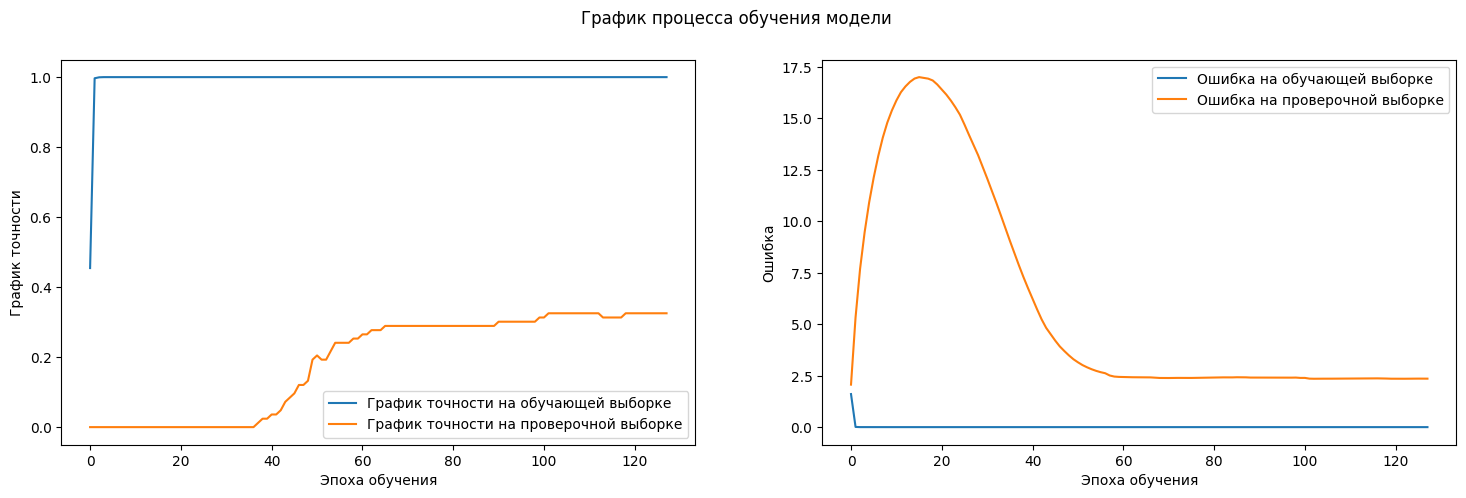

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


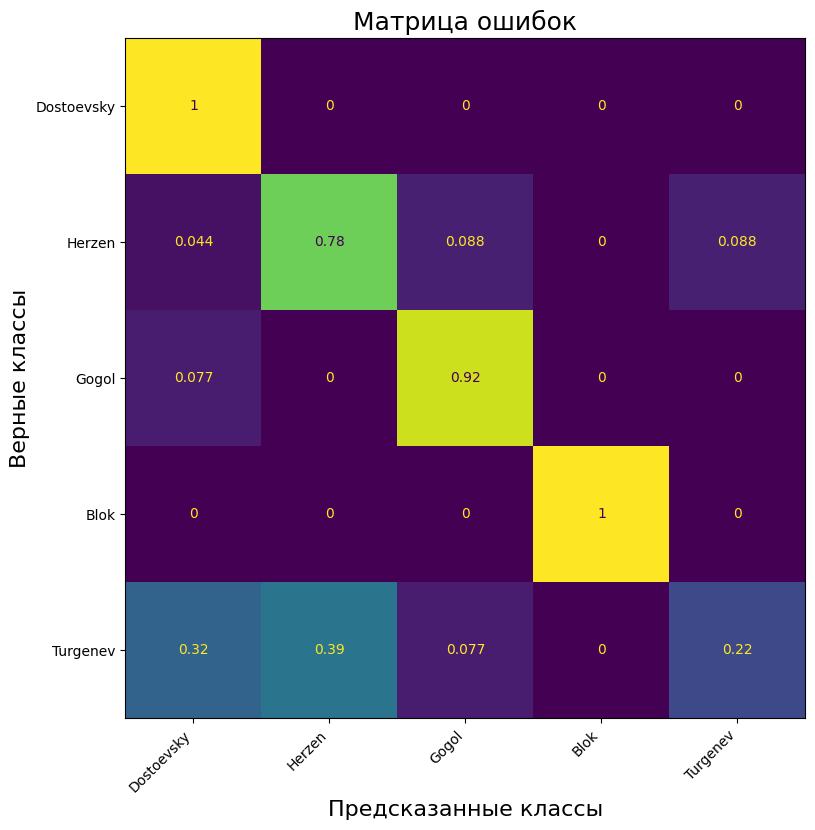


Средняя точность распознавания:  78%


In [ ]:
# Установка библиотеки Navec
!pip install navec

# Загрузка модели Navec
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
from navec import Navec
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

# Импорт необходимых библиотек
import keras
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка данных
data_path = keras.utils.get_file("russian_literature.zip", "https://storage.yandexcloud.net/academy.ai/russian_literature.zip")
!unzip -qo "{data_path}" -d ./dataset

# Список 5 любимых писателей
CLASS_LIST = ["Dostoevsky", "Herzen", "Gogol", "Blok", "Turgenev"]

# Сбор в словарь
all_texts = {}

for author in CLASS_LIST:
    all_texts[author] = ''
    for path in glob.glob(f'./dataset/prose/{author}/*.txt') + glob.glob(f'./dataset/poems/{author}/*.txt'):
        with open(path, 'r', errors='ignore') as f:
            text = f.read()
        all_texts[author] += ' ' + text.replace('\n', ' ')

# Токенизация текста
embedding_dim = 300
max_words = 10000

tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-–—./…:;<=>?@[\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(all_texts.values())

seq_train = tokenizer.texts_to_sequences(all_texts.values())
seq_train_balance = [seq_train[cls][:100_000] for cls in range(len(CLASS_LIST))]

# Вывод информации о датасете
total = sum(len(i) for i in seq_train)
print(f'Датасет состоит из {total} слов')

mean_list = np.array([])
for author in CLASS_LIST:
    cls = CLASS_LIST.index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))

# Визуализация распределения данных
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance], labels=CLASS_LIST, pctdistance=1.2, labeldistance=1.4, autopct='%1.2f%%')
plt.show()

# Определение параметров для скользящего окна
WIN_SIZE = 1000
WIN_STEP = 100

# Функция разбиения последовательности на отрезки скользящим окном
def seq_split(sequence, win_size, step):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, step)]

# Функция векторизации последовательности
def seq_vectorize(seq_list, test_split, class_list, win_size, step):
    x_train, y_train, x_test, y_test = [], [], [], []

    for class_item in class_list:
        cls = class_list.index(class_item)
        gate_split = int(len(seq_list[cls]) * (1 - test_split))
        vectors_train = seq_split(seq_list[cls][:gate_split], win_size, step)
        vectors_test = seq_split(seq_list[cls][gate_split:], win_size, step)

        x_train += vectors_train
        x_test += vectors_test
        y_train += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_train)
        y_test += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_test)

    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

# Векторизация данных
x_train, y_train, x_test, y_test = seq_vectorize(seq_train_balance, 0.1, CLASS_LIST, WIN_SIZE, WIN_STEP)

print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных для обучающей выборки: {y_train.shape}')
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных для тестовой выборки: {y_test.shape}')

# Функция вывода графиков точности и ошибки
def show_plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'], label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода матрицы ошибок
def show_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), normalize='true')
    cm = np.around(cm, 3)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()

    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

# Создание модели
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=WIN_SIZE))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(len(CLASS_LIST), activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Создание матрицы эмбеддингов
word_index = tokenizer.word_index
embeddings_index = navec

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Обучение модели
callbacks = [keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=0)]
history = model.fit(x_train, y_train, epochs=128, batch_size=256, validation_split=0.02, callbacks=callbacks)

# Вывод графиков обучения
show_plot(history)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)
show_confusion_matrix(y_test, y_pred, CLASS_LIST)